In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("creditcard.csv")
data=data.drop_duplicates(subset=None,keep='first',inplace=False)

In [3]:
x = data.drop("Class",axis = 1)
y = data["Class"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc= StandardScaler()

In [8]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [10]:
y_pred = nb.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

In [12]:
accuracy_score(y_test,y_pred)

0.9774430790197138

In [13]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[83094  1895]
 [   25   104]]


In [14]:
classification_report= classification_report(y_test,y_pred)

In [15]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84989
           1       0.05      0.81      0.10       129

    accuracy                           0.98     85118
   macro avg       0.53      0.89      0.54     85118
weighted avg       1.00      0.98      0.99     85118



In [16]:
from sklearn.metrics import roc_curve

In [17]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

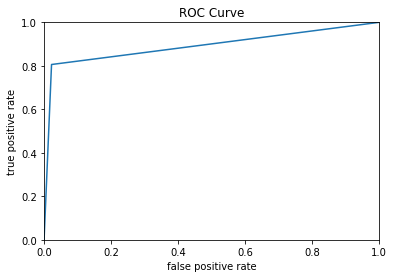

0.891952273623007

In [18]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score =  roc_auc_score(y_test,y_pred)
ROC_score


In [19]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [23]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 8)

In [25]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
y_pred = xgb.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.9995888061279635

In [28]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[84982     7]
 [   28   101]]


In [29]:
from sklearn.metrics import roc_curve

In [30]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

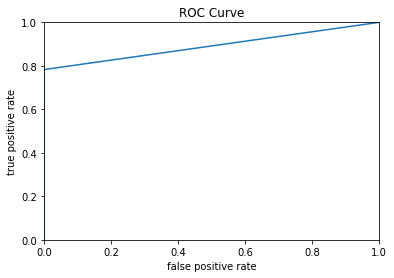

0.8914316864170567

In [31]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score =  roc_auc_score(y_test,y_pred)
ROC_score


In [32]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  

In [56]:
from xgboost import XGBClassifier

In [63]:
xbgclassifier = XGBClassifier()

In [64]:
xbgclassifier.fit(x_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [65]:
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
    
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [67]:
random_search = RandomizedSearchCV(xbgclassifier, param_distributions = params,n_iter=5,scoring = 'roc_auc',n_jobs=-1,cv=5,verbose=3)

In [71]:
y_pred_res = xbgclassifier.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred_res)

0.9992128574449588

In [73]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_res)

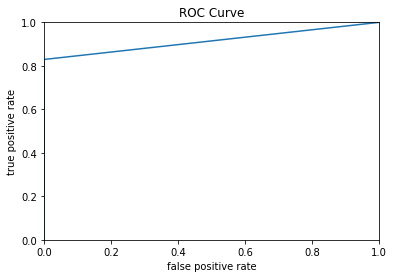

0.9144639420277006

In [74]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score = roc_auc_score(y_test,y_pred_res)
ROC_score


In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [76]:
lr.fit(x_train_res,y_train_res)
y_pred_res2 = lr.predict(x_test)

In [77]:
accuracy_score(y_test,y_pred_res2)

0.9734368758664442

In [78]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_res2)

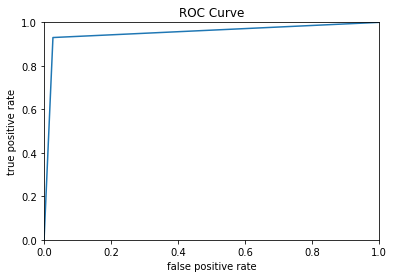

0.951867505699096

In [79]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr,marker= " ")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC Curve")
plt.show()
ROC_score =  roc_auc_score(y_test,y_pred_res2)
ROC_score